# Python graphics:  Matplotlib fundamentals

We illustrate three approaches to graphing data with Python's Matplotlib package:    

* Approach #1:  Apply a `plot()` method to a dataframe
* Approach #2:  Use the `plot(x,y)` function 
* Approach #3:  Create a figure object and apply methods to it

The last one is the least intuitive but also the most useful.  We work up to it gradually.  

This IPython notebook was created for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  
A product of the NYU Python Factory.  

## Preliminaries 

### Jupyter 

Look around, what do you see?  Check out the **menubar** at the top:  File, Edit, etc.  Also the **toolbar** below it.  Click on Help -> User Interface Tour for a tour of the landscape.  

### Package versions

In [65]:
# check versions of packages (overkill, but why not?)
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib as mpl               # graphics package
import datetime as dt                  # date and time module

print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Matplotlib version: ', mpl.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.0 |Anaconda 2.4.0 (64-bit)| (default, Oct 20 2015, 07:26:33) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.17.0
Matplotlib version:  1.4.3
Today:  2016-01-05


In [66]:
# This is an IPython command.  It puts plots here in the notebook, rather than  a separate window.
%matplotlib inline

### Create dataframes to play with 

* US GDP and consumption 
* World Bank GDP per capita for several countries 
* Fama-French equity returns 

In [67]:
# US GDP and consumption 
gdp  = [13271.1, 13773.5, 14234.2, 14613.8, 14873.7, 14830.4, 14418.7,
        14783.8, 15020.6, 15369.2, 15710.3]
pce  = [8867.6, 9208.2, 9531.8, 9821.7, 10041.6, 10007.2, 9847.0, 10036.3,
        10263.5, 10449.7, 10699.7]
year = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

# create dataframe from dictionary 
us = pd.DataFrame({'gdp': gdp, 'pce': pce}, index=year) 
print(us)

          gdp      pce
2003  13271.1   8867.6
2004  13773.5   9208.2
2005  14234.2   9531.8
2006  14613.8   9821.7
2007  14873.7  10041.6
2008  14830.4  10007.2
2009  14418.7   9847.0
2010  14783.8  10036.3
2011  15020.6  10263.5
2012  15369.2  10449.7
2013  15710.3  10699.7


In [68]:
# GDP per capita (World Bank data, 2013, thousands of USD) 
code    = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
country = ['United States', 'France', 'Japan', 'China', 'India',
             'Brazil', 'Mexico']
gdppc   = [53.1, 36.9, 36.3, 11.9, 5.4, 15.0, 16.5]

wb = pd.DataFrame({'gdppc': gdppc, 'country': country}, index=code)
wb

,country,gdppc
USA,United States,53.1
FRA,France,36.9
JPN,Japan,36.3
CHN,China,11.9
IND,India,5.4
BRA,Brazil,15.0
MEX,Mexico,16.5


In [69]:
# Fama-French 
import pandas.io.data as web

# read annual data from website and rename variables 
ff = web.DataReader('F-F_Research_Data_factors', 'famafrench')[1]
ff.columns = ['xsm', 'smb', 'hml', 'rf']
ff['rm'] = ff['xsm'] + ff['rf']
ff = ff[['rm', 'rf']]     # extract rm and rf (return on market, riskfree rate, percent)
ff.head(5)

,rm,rf
1927,32.59,3.12
1928,38.95,3.56
1929,-14.79,4.75
1930,-28.82,2.41
1931,-44.04,1.07


In [70]:
# This is an IPython command:  it says to put plots here in the notebook, rather than open a separate window.
%matplotlib inline

## Approach #1:  Apply `plot()` method to dataframe

Good simple approach, we use it a lot.  

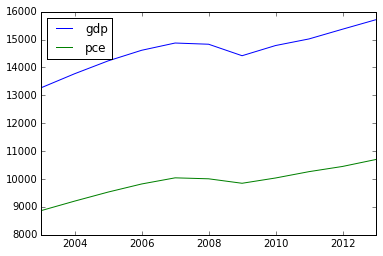

In [71]:
# try this with US GDP
us.plot()

**Exercise.** What would you do with this graph to make it look better?  

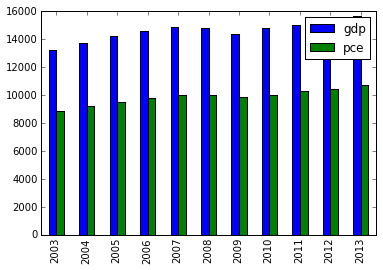

In [72]:
us.plot(kind='bar')

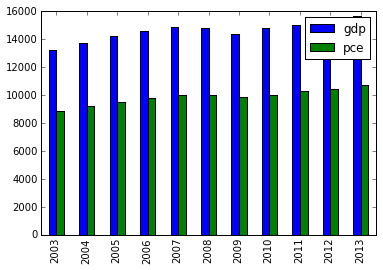

In [73]:
# same thing, different syntax 
us.plot.bar()

**Exercise.**  We can get help in IPython by adding a question mark after a function or method.  Ask for help with the `plot()` method by typing `us.plot?` in the code box below.  What options do you see?  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D5CB940>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D648668>], dtype=object)

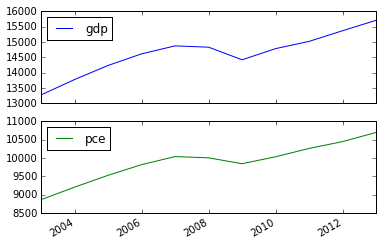

In [74]:
# plot variables separately
us.plot(kind='line', subplots=True)

C:\Users\dbackus\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


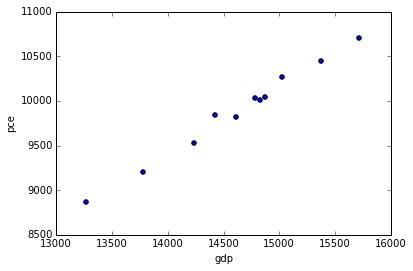

In [75]:
# scatter plot -- but we need to be clear about the x and y variables 
us.plot.scatter('gdp', 'pce')

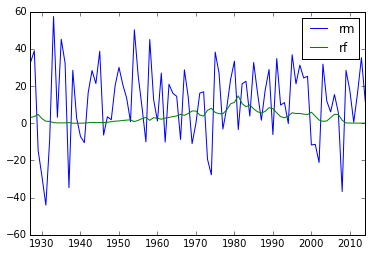

In [76]:
# now try a few things with the Fama-French data
ff.plot()

**Exercise.** We can dress up the plots using the arguments of the `plot()` function.  Try adding, one at a time, the arguments `title='Fama-French returns'` and `legend=False`.  What does the documentation say about them?  What do they do?  

**Exercise.** Create a scatter plot of the equity return `rm` vs the riskfree return `rf`.

**Exercise.** What do the arguments do in the code below?  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D798AC8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D7F8860>], dtype=object)

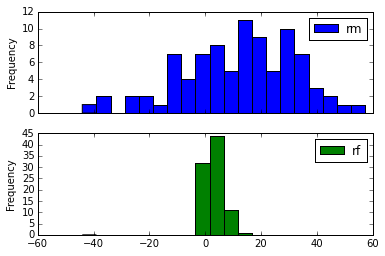

In [77]:
ff.plot(kind='hist', bins=20, subplots=True)

**Exercise.** What do you see here?  How do the returns differ?  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E8FFD68>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E947668>], dtype=object)

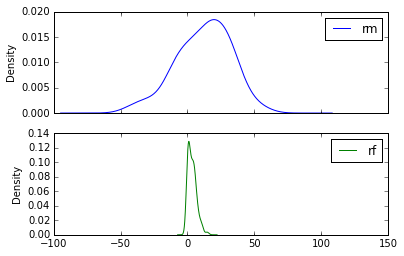

In [78]:
ff.plot(kind='kde', subplots=True)    # this smoothes the histogram ("kernel density estimate")

**Exercise.** Use the World Bank dataframe `wb` to create a bar chart of GDP per capita.  *Bonus points:* Create a horizontal bar chart.  *Double bonus:*  add country name labels to it.  

## Approach #2:  the `plot(x,y)` function 

Here we plot variable `y` against variable `x`.  Sounds intuitive, but it's not always.  For example, what do we do if the `x` variable is a set of country names?  We don't use it much, but similar ideas pop up elsewhere so it's worth a quick look.  

In [79]:
# import pyplot module of Matplotlib 
import matplotlib.pyplot as plt      

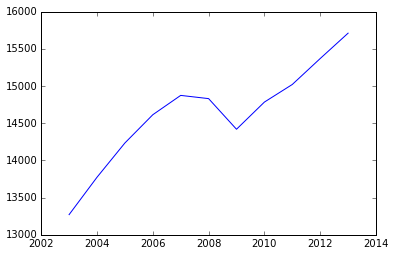

In [80]:
plt.plot(us.index, us['gdp'])

**Exercise.** What is the `x` variable here?  What do the `plot()` methods in Approach #1 use for `x`?  

<Container object of 11 artists>

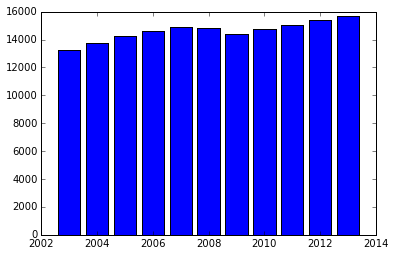

In [81]:
plt.bar(us.index, us['gdp'], align='center')

<Container object of 11 artists>

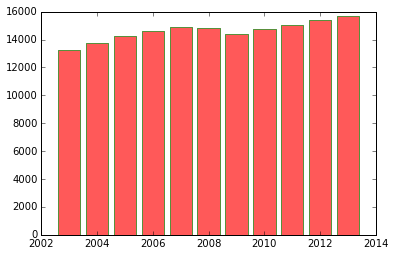

In [82]:
# we can use arguments to add/change features
plt.bar(us.index, us['gdp'], align='center', alpha=0.65, color='red', edgecolor='green')

**Exercise.** What do the various arguments do?  Play with them one at a time to see.  Or use `plt.bar?` to look them up. *Bonus points:*  What can you do to make this even uglier?  

<Container object of 11 artists>

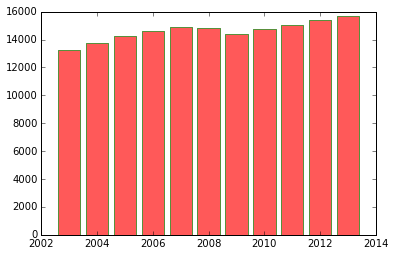

In [83]:
# change as you see fit 
plt.bar(us.index, us['gdp'], align='center', alpha=0.65, color='red', edgecolor='green')

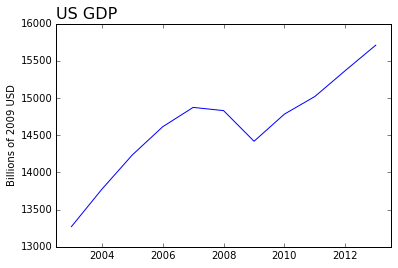

In [84]:
# we can also add things to plots 
plt.plot(us.index, us['gdp']) 
plt.title('US GDP', fontsize=16, loc='left')
plt.xlim((2002.5, 2013.5))
plt.ylabel('Billions of 2009 USD')

**Exercise.** Add a `plt.ylim` statement to make the `y` axis start at zero, as it did in the bar charts.  *Bonus points:*  Change the color to magenta and the linewidth to 2.  *Hint:*  Use `plt.plot?` to get the documentation.  

## Approach #3:  create objects and apply methods to them 

This is the most complicated, but now that we're used to it we like it a lot.  We either use it on its own, or adapt its functionality to the dataframe plot methods we saw in Approach #1.  The idea is to generate an object -- two objects, in fact -- and apply methods to it to produce the various elements of a graph:  the data, their axes, their labels, and so on.  

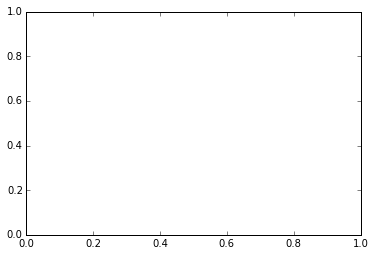

In [85]:
# create fig and ax objects
fig, ax = plt.subplots()

**Exercise.** What do we have here?  What `type` are `fig` and `ax`?  

We say `fig` is a **figure object** and `ax` is an **axis object**.  This means:
    
* `fig` is a blank canvas for creating a figure.
* `ax` is everything in it:  axes, labels, lines or bars, and so on.  

**Exercise.** Use tab completion to see what methods are available for `fig` and `ax`.  What do you see? 

In [86]:
type(fig) 

matplotlib.figure.Figure

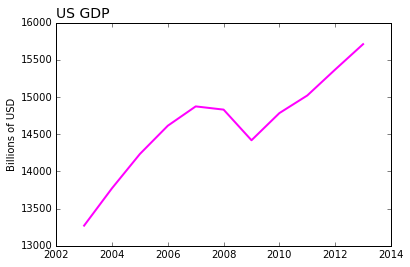

In [87]:
# let's try that again 
# create objects 
fig, ax = plt.subplots()

# add things to figure by applying methods to ax 
ax.plot(us.index, us['gdp'], linewidth=2, color='magenta')
ax.set_title('US GDP', fontsize=14, loc='left')
ax.set_ylabel('Billions of USD')

In [88]:
# a figure method: save figure as a pdf 
fig.savefig('../Temp/us_gdp.pdf')

In [89]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

**Exercise.** ??

## Review the bidding

??

**Exercise.** ??

## Approach #1 revisited 

In Approach #1, we applied `plot()` and related methods to a dataframe.  We also used arguments to fix up the graph, but that got complicated pretty quickly.  

Here we combine Approaches 1 and 3.  If we check the documentation of `df.plot()` we see that it "returns" an axis object.  We can assign it to a variable and then apply lots of methods to make the figure more effective and attractive.  

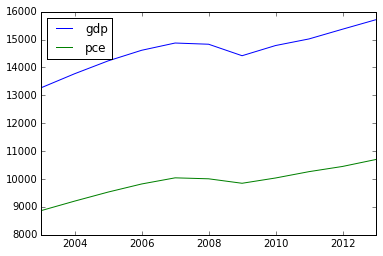

In [90]:
# grab the axis
ax = us.plot()

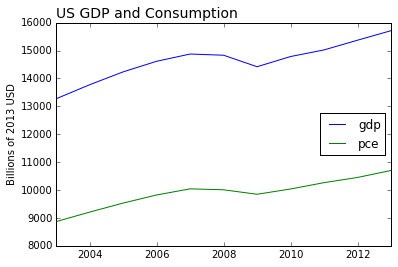

In [91]:
# grab it and apply methods 
ax = us.plot()
ax.set_title('US GDP and Consumption', fontsize=14, loc='left')
ax.set_ylabel('Billions of 2013 USD')
ax.legend(loc='center right')

## Multiple subplots 

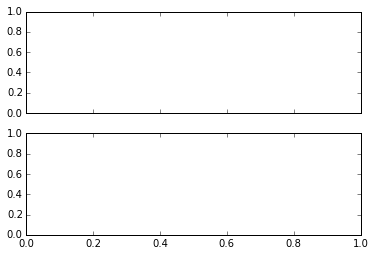

In [92]:
# object oriented version
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)

In [93]:
# how big is ax?
len(ax)

2

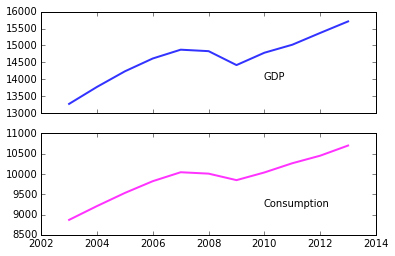

In [94]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)

# first figure
ax[0].plot(us.index, us['gdp'], color='blue', linewidth=2, alpha=0.8)
ax[0].text(2010, 14000, 'GDP')

# second figure
ax[1].plot(us.index, us['pce'], color='magenta', linewidth=2, alpha=0.8)
ax[1].text(2010, 9200, 'Consumption')

## Example:  Income by college major 

## Example:  Student test scores (PISA) 

## Example:  World Bank data

* Bar charts of GDP and GDP per capita 
* Scatterplot (bubble plot) of life expectancy v GDP per capita 

In [95]:
# load packages (redundancy is ok)
import pandas as pd                # data management tools
from pandas.io import wb           # World Bank api
import matplotlib.pyplot as plt    # plotting tools

# variable list
var = ['NY.GDP.PCAP.PP.KD', 'NY.GDP.MKTP.PP.KD', 'SP.DYN.LE00.IN']  
# country list (ISO codes)
iso = ['USA', 'FRA', 'JPN', 'CHN', 'IND', 'BRA', 'MEX']
year = 2013

# get data from World Bank 
df = wb.download(indicator=var, country=iso, start=year, end=year)

# massage data
df = df.reset_index(level='year', drop=True)
df.columns = ['gdppc', 'gdp', 'le']    # rename variables
df['pop']  = df['gdp']/df['gdppc']     # population 
df['gdp'] = df['gdp']/10**12           # convert to trillions
df['gdppc'] = df['gdppc']/10**3        # convert to thousands
df['order'] = [5, 3, 1, 4, 2, 6, 0]    # reorder countries
#df = df.sort(columns='order', ascending=False)
df = df.sort_values(by='order', ascending=False)
df

,gdppc,gdp,le,pop,order
country,,,,,
Mexico,16.140664,1.997247,76.532659,1.237401e+08,6
Brazil,15.222320,3.109302,74.122439,2.042594e+08,5
India,5.131826,6.566166,67.660415,1.279499e+09,4
China,11.805087,16.023988,75.353024,1.357380e+09,3
Japan,35.614310,4.535077,83.331951,1.273386e+08,2
France,37.306283,2.459435,81.968293,6.592550e+07,1
United States,51.281583,16.230494,78.841463,3.164975e+08,0


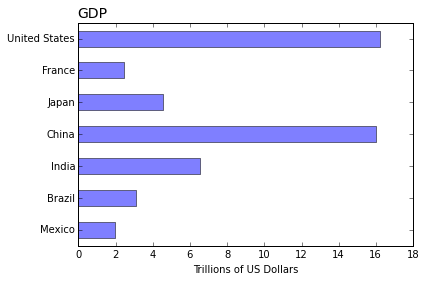

In [96]:
# GDP bar chart
ax = df['gdp'].plot(kind='barh', alpha=0.5)
ax.set_title('GDP', loc='left', fontsize=14)
ax.set_xlabel('Trillions of US Dollars')
ax.set_ylabel('')

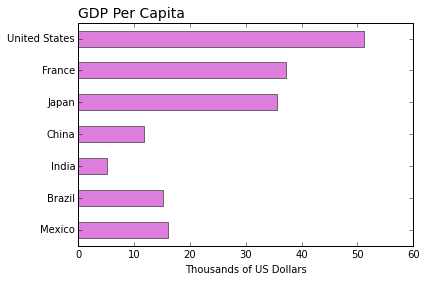

In [97]:
# ditto for GDP per capita (per person)
ax = df['gdppc'].plot(kind='barh', color='m', alpha=0.5)
ax.set_title('GDP Per Capita', loc='left', fontsize=14)
ax.set_xlabel('Thousands of US Dollars')
ax.set_ylabel('')

C:\Users\dbackus\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


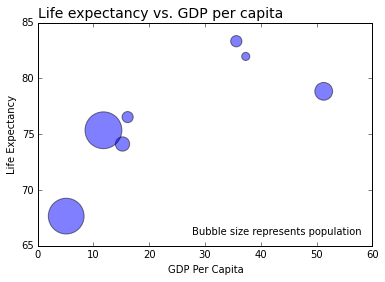

In [98]:
# scatterplot of life expectancy vs gdp per capita
plt.scatter(df['gdppc'], df['le'],      # x,y variables 
            s=df['pop']/10**6,          # size of bubbles 
            alpha=0.5)   
plt.title('Life expectancy vs. GDP per capita', loc='left', fontsize=14)
plt.xlabel('GDP Per Capita')
plt.ylabel('Life Expectancy')
plt.text(58, 66, 'Bubble size represents population', horizontalalignment='right',)

In [99]:
plt.text?

## Example:  US economic indicators 